## Library Setup

In [4]:
!pip install scikit-image
!pip install scikit-learn
!pip install opencv-python
!pip install opencv-contrib-python
!pip install numpy
!pip install matplotlib
!pip install scikit-optimize
!pip install tqdm
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 4.3 MB/s eta 0:00:24
   ---------------------------------------- 0.2/99.8 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.4/99.8 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.5/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.8/99.8 MB 3.8 MB/s eta 0:00:26
   ---------------------------------------- 1.0/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 1.2/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/99.8 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.5/99.8 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.8/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 2.2/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 2.4/99.8 MB 4.4 MB/s eta 0:00:22
   - -

## Dataset Download

In [101]:
!git clone https://github.com/folfcoder/recaptcha-dataset.git

Cloning into 'recaptcha-dataset'...
Updating files:   6% (719/11779)
Updating files:   7% (825/11779)
Updating files:   8% (943/11779)
Updating files:   9% (1061/11779)
Updating files:  10% (1178/11779)
Updating files:  11% (1296/11779)
Updating files:  11% (1330/11779)
Updating files:  12% (1414/11779)
Updating files:  13% (1532/11779)
Updating files:  14% (1650/11779)
Updating files:  15% (1767/11779)
Updating files:  16% (1885/11779)
Updating files:  16% (1943/11779)
Updating files:  17% (2003/11779)
Updating files:  18% (2121/11779)
Updating files:  19% (2239/11779)
Updating files:  20% (2356/11779)
Updating files:  21% (2474/11779)
Updating files:  21% (2539/11779)
Updating files:  22% (2592/11779)
Updating files:  23% (2710/11779)
Updating files:  24% (2827/11779)
Updating files:  25% (2945/11779)
Updating files:  26% (3063/11779)
Updating files:  27% (3181/11779)
Updating files:  27% (3194/11779)
Updating files:  28% (3299/11779)
Updating files:  29% (3416/11779)
Updating files:

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt    

C:\Users\gdeok\AppData\Local\Temp\ipykernel_14060\2055561704.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Preprocessing

In [4]:
#### Point processing

# contrast_stretching
def contrast_stretching(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def log_trans(image):
    # scale the pixel values to avoid log(0)
    c = 255 / np.log(1 + np.max(image))  # scale factor
    log_transformed_image = c * np.log(1 + image)  # apply log transformation formula
    
    # convert back to uint8
    log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)

    return log_transformed_image

def power_law(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def high_boost_filtering(image, highpass, A=1.5):
    high_boosted = (A-1)*image+highpass
    high_boosted = np.clip(high_boosted, 0, 255)
    high_boosted = np.uint8(high_boosted)

    return high_boosted

def sharpening(image):
    blur_gauss = cv2.GaussianBlur(image, (3,3), sigmaX=10,sigmaY= 10)
    image32 = np.float32(image)
    blur_gauss32 = np.float32(blur_gauss)

    # Subtract the Gaussian blurred image from the original/processed image to get the high frequency components
    mask = cv2.subtract(image32, blur_gauss32)

    alpha = 1.5
    sharpened_image = cv2.addWeighted(image32, 3+alpha, mask, -3-alpha, 0)
    sharpened_image = cv2.convertScaleAbs(sharpened_image)

    return sharpened_image

def opening(image):
    kernel = np.ones((2,2), np.uint8)
    opening_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    return opening_image

def closing(image):
    kernel = np.ones((2,2), np.uint8)
    opening_image = cv2.morphologyEx(image, cv2.MORPH_CROSS, kernel)

    return opening_image

In [14]:
# Load the image in grayscale # 3, 9, 10, 11
image_path = 'C:/Users/gdeok/Computer-Vision/early-vision/recaptcha-dataset/Large/Bicycle/Bicycle (3).png'
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found")
original_image=image

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# contrast stretching
#image= contrast_stretching(image)

# log transform
#image = log_trans(image)

# law-power stretching
#iamge = power_law(image, gamma=0.5)

#strech_image = image

image = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0, sigmaY=0)

# Equalized Histogram
equalized_image=cv2.equalizeHist(image)

# sharpening Image
igb=cv2.GaussianBlur(original_image, ksize=(3,3), sigmaX=0, sigmaY=0)
sharp = cv2.addWeighted(original_image, 2, igb, -1, 0)

#### Area processing

In [6]:
# blur filtering
blur_gauss = cv2.GaussianBlur(equalized_image, (3,3), sigmaX=2,sigmaY=2, )

In [7]:
# edge
## Canny operator
ret, otsu_thresh_image = cv2.threshold(blur_gauss, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lower = int(max(0, 0.5 * ret))
upper = int(min(255, 1.5 * ret))
edge_canny=cv2.Canny(blur_gauss, lower, upper)

## Sobel Operator
sobelx = cv2.Sobel(blur_gauss, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3, delta=128)
sobely = cv2.Sobel(blur_gauss, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3, delta=128)
gradient_magnitude = cv2.magnitude(sobelx, sobely)

## LoG
log = cv2.Laplacian(equalized_image, -1, ksize=3, scale=1.5)

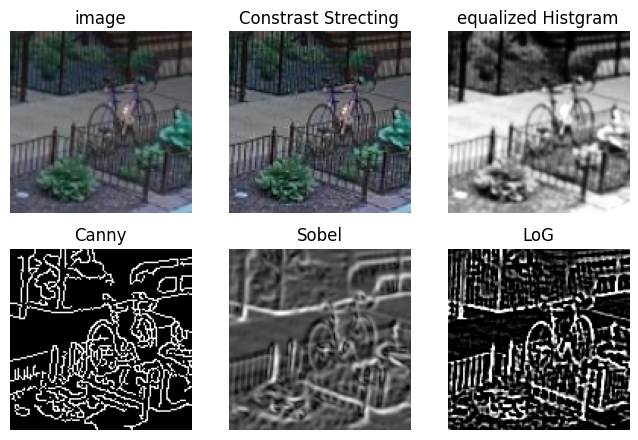

In [52]:
# visualization
plt.figure(figsize=(8, 8))

plt.subplot(3, 3, 1)
plt.title('image')
plt.axis('off')
plt.imshow(original_image)

plt.subplot(3, 3, 2)
plt.title('Constrast Strecting')
plt.axis('off')
plt.imshow(sharp)

plt.subplot(3, 3, 3)
plt.title('equalized Histgram')
plt.axis('off')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(3, 3, 4)
plt.title('Canny')
plt.axis('off')
plt.imshow(edge_canny, cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Sobel')
plt.axis('off')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(3, 3, 6)
plt.title('LoG')
plt.axis('off')
plt.imshow(log, cmap='gray')

## Mid Level Features

### Color

In [2]:
def hsv_histogram(image, bins=(8, 8, 8)):
    # 이미지가 grayscale인지 확인하고 컬러 이미지로 변환
    if len(image.shape) == 2:
       image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    gb=cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0, sigmaY=0)
    
    # HSV 색공간으로 변환
    hsv_image = cv2.cvtColor(gb, cv2.COLOR_BGR2HSV)
    
    # 히스토그램 계산 및 정규화
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    
    return hist.flatten()


In [36]:
hist = hsv_histogram(image, bins=(8,8,8))

# 히스토그램 출력
print("히스토그램 크기:", hist.shape)
print("히스토그램 값:", hist.flatten())

# 히스토그램 시각화 
plt.figure()
plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.plot(hist.flatten())
plt.xlim([0, 512])
plt.show()

NameError: name 'hsv_histogram' is not defined

### Texture

#### $ LBP_{P,R}^{riu2} $

In [3]:
class LBP_riu2:
    def __init__(self, P=8, R=1):
        self.P = P  # Number of points
        self.R = R  # Radius
        self.angles = np.arange(P) * (2 * np.pi / P)
        self.cos_angles = R * np.cos(self.angles)
        self.sin_angles = R * np.sin(self.angles)

    def _thresholded(self, center, pixels):
        return (pixels >= center).astype(int)

    def s(self, x):
        return 1 if x >= 0 else 0

    def _uniformity(self, pattern):
        transitions = np.sum(pattern[:-1] != pattern[1:]) + (pattern[-1] != pattern[0])
        return transitions

    def _get_pixel_neighbors(self, image, center_x, center_y):
        x = self.cos_angles + center_x
        y = self.sin_angles + center_y
        x = np.clip(x, 0, image.shape[1] - 1).astype(int)
        y = np.clip(y, 0, image.shape[0] - 1).astype(int)
        return image[y, x]

    def _rotate_to_min(self, binary_pattern):
        # Rotate the binary pattern to its minimum value (circularly)
        min_pattern = binary_pattern
        min_value = np.sum(binary_pattern * (1 << np.arange(len(binary_pattern))))
        for i in range(1, len(binary_pattern)):
            rotated_pattern = np.roll(binary_pattern, i)
            rotated_value = np.sum(rotated_pattern * (1 << np.arange(len(rotated_pattern))))
            if rotated_value < min_value:
                min_value = rotated_value
                min_pattern = rotated_pattern
        return min_pattern
    
    def compute_lbp(self, image):
        rows, cols = image.shape
        lbp_image = np.zeros((rows - 2 * self.R, cols - 2 * self.R), dtype=np.uint8)

        for i in range(self.R, rows - self.R):
            for j in range(self.R, cols - self.R):
                center = image[i, j]
                pixels = self._get_pixel_neighbors(image, j, i)
                binary_pattern = self._thresholded(center, pixels)
                uniformity = self._uniformity(binary_pattern)
                if uniformity <= 2:
                    rotated_pattern = self._rotate_to_min(binary_pattern)
                    lbp_value = np.sum(rotated_pattern * (1 << np.arange(self.P)))
                else:
                    lbp_value = self.P + 1
                lbp_image[i - self.R, j - self.R] = lbp_value
        return lbp_image

    def compute_histogram(self, lbp_image):
        n_bins = self.P + 2  # Number of bins to account for all patterns
        hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins, range=(0, n_bins))
        hist = hist.astype("float")
        hist /= hist.sum()  # Normalize the histogram
        return hist


#### $ Var_{P, R} $

In [4]:
class Var:
    def __init__(self, P=8):
        self.P = P
        self.angles = np.arange(P) * (2 * np.pi / P)
        self.cos_angles = np.cos(self.angles)
        self.sin_angles = np.sin(self.angles)

    def _get_pixel_neighbors(self, image, center_x, center_y, R):
        x = R * self.cos_angles + center_x
        y = R * self.sin_angles + center_y
        x = np.clip(x, 0, image.shape[1] - 1).astype(int)
        y = np.clip(y, 0, image.shape[0] - 1).astype(int)
        return image[y, x]

    def compute_var(self, image, R):
        rows, cols = image.shape
        var_image = np.zeros((rows - 2 * R, cols - 2 * R), dtype=np.float32)
        
        for i in range(R, rows - R):
            for j in range(R, cols - R):
                neighbors = self._get_pixel_neighbors(image, j, i, R)
                mu = np.mean(neighbors)
                var_image[i - R, j - R] = np.sum((neighbors - mu) ** 2) / self.P
        
        return var_image

#### $LBP_{P,R}^{riu2} / VAR_{P,R} $  $ MultiResolution $

In [5]:
def compute_lbp_var_multiresolution(image, params):
    combined_histogram = np.zeros(26)
    #lbp_histograms = []
    #var_histograms = []
    lbp_var_features = []

    for P, R in params:
        # Compute LBP features
        lbp_extractor = LBP_riu2(P=P, R=R)
        lbp_image = lbp_extractor.compute_lbp(image)
        lbp_histogram = lbp_extractor.compute_histogram(lbp_image)
        #lbp_histograms.append(lbp_histogram)
        
        # Compute VAR features
        var_extractor = Var(P=P)
        var_image = var_extractor.compute_var(image, R)
        n_bins = P + 2
        var_histogram, _ = np.histogram(var_image.ravel(), bins=n_bins, range=(0, var_image.max() + 1e-7))
        var_histogram = var_histogram.astype("float")
        var_histogram /= var_histogram.sum()
        #var_histograms.append(var_histogram)

        # Compute LBP+VAR features
        lbp_var = lbp_histogram + var_histogram
        lbp_var_features.append(lbp_var)

        # Combine histograms
        if P == 8 and R == 1:
            combined_histogram[:len(lbp_var)] += lbp_var
        elif P == 24 and R == 3:
            combined_histogram[-len(lbp_var):] += lbp_var
    
    return combined_histogram 
#, lbp_histograms, var_histograms, lbp_var_features

"""
# Example usage
params = [(8, 1), (24, 3)]
combined_histogram = compute_lbp_var_multiresolution(equalized_image, params)
#, lbp_histograms, var_histograms, lbp_var_features

#lbp_var_hist = pd.DataFrame(lbp_var_features)
#lbp_var_hist.to_csv('lpb_var_hist.csv', index=False)

combined_hist = pd.DataFrame(combined_histogram.reshape(1, -1))
combined_hist.to_csv('combined_hist.csv', index=False)

num_params = len(params)
fig, axes = plt.subplots(num_params + 1, 3, figsize=(8, 5 * (num_params + 1)))

for idx, (lbp_hist, var_hist, lbp_var_hist, (P, R)) in enumerate(zip(lbp_histograms, var_histograms, lbp_var_features, params)):
    axes[idx, 0].bar(range(len(lbp_hist)), lbp_hist, color='blue', alpha=0.7)
    axes[idx, 0].set_title(f'LBP Histogram (P={P}, R={R})')
    
    axes[idx, 1].bar(range(len(var_hist)), var_hist, color='green', alpha=0.7)
    axes[idx, 1].set_title(f'VAR Histogram (P={P}, R={R})')
    
    axes[idx, 2].bar(range(len(lbp_var_hist)), lbp_var_hist, color='red', alpha=0.7)
    axes[idx, 2].set_title(f'LBP+VAR Histogram (P={P}, R={R})')

# Plot combined histogram
axes[-1, 0].bar(range(len(combined_histogram)), combined_histogram, color='purple', alpha=0.7)
axes[-1, 0].set_title('Combined Histogram')

# Hide unused subplots in the last row
for ax in axes[-1, 1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
"""

"\n# Example usage\nparams = [(8, 1), (24, 3)]\ncombined_histogram = compute_lbp_var_multiresolution(equalized_image, params)\n#, lbp_histograms, var_histograms, lbp_var_features\n\n#lbp_var_hist = pd.DataFrame(lbp_var_features)\n#lbp_var_hist.to_csv('lpb_var_hist.csv', index=False)\n\ncombined_hist = pd.DataFrame(combined_histogram.reshape(1, -1))\ncombined_hist.to_csv('combined_hist.csv', index=False)\n\nnum_params = len(params)\nfig, axes = plt.subplots(num_params + 1, 3, figsize=(8, 5 * (num_params + 1)))\n\nfor idx, (lbp_hist, var_hist, lbp_var_hist, (P, R)) in enumerate(zip(lbp_histograms, var_histograms, lbp_var_features, params)):\n    axes[idx, 0].bar(range(len(lbp_hist)), lbp_hist, color='blue', alpha=0.7)\n    axes[idx, 0].set_title(f'LBP Histogram (P={P}, R={R})')\n    \n    axes[idx, 1].bar(range(len(var_hist)), var_hist, color='green', alpha=0.7)\n    axes[idx, 1].set_title(f'VAR Histogram (P={P}, R={R})')\n    \n    axes[idx, 2].bar(range(len(lbp_var_hist)), lbp_var_hist

In [10]:
def resize_image(image, target_shape):
    return cv2.resize(image, target_shape, interpolation=cv2.INTER_AREA)

def compute_lbp_var_images(image, params):
    lbp_images = []
    var_images = []
    lbp_var_images = []
    combined_images = None

    for P, R in params:
        # Compute LBP features
        lbp_extractor = LBP_riu2(P=P, R=R)
        lbp_image = lbp_extractor.compute_lbp(image)
        lbp_images.append(lbp_image)
        
        # Compute VAR features
        var_extractor = Var(P=P)
        var_image = var_extractor.compute_var(image, R)
        var_images.append(var_image)
        
        # Resize images to the same shape
        target_shape = min(lbp_image.shape, var_image.shape)
        lbp_image_resized = resize_image(lbp_image, target_shape)
        var_image_resized = resize_image(var_image, target_shape)
        
        # Normalize LBP and VAR images
        lbp_image_normalized = lbp_image_resized / lbp_image_resized.sum()
        var_image_normalized = var_image_resized / var_image_resized.sum()

        # Compute LBP+VAR image
        lbp_var_image = lbp_image_normalized + var_image_normalized
        lbp_var_images.append(lbp_var_image)

        # Combine LBP+VAR images
        if combined_images is None:
            combined_images = lbp_var_image
        else:
            combined_images = resize_image(combined_images, lbp_var_image.shape)
            combined_images += lbp_var_image

    return lbp_images, var_images, lbp_var_images, combined_images

# Example usage
params = [(8, 1), (24, 3)]
lbp_images, var_images, lbp_var_images, combined_images = compute_lbp_var_images(equalized_image, params)

fig, axes = plt.subplots(4, len(params), figsize=(12, 10))
for idx, (lbp_img, var_img, lbp_var_img, (P, R)) in enumerate(zip(lbp_images, var_images, lbp_var_images, params)):
    axes[0, idx].imshow(lbp_img, cmap='gray')
    axes[0, idx].set_title(f'LBP P={P}, R={R}')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(var_img, cmap='gray')
    axes[1, idx].set_title(f'VAR P={P}, R={R}')
    axes[1, idx].axis('off')

    axes[2, idx].imshow(lbp_var_img, cmap='gray')
    axes[2, idx].set_title(f'LBP/VAR P={P}, R={R}')
    axes[2, idx].axis('off')

axes[3, 0].imshow(combined_images, cmap='gray')
axes[3, 0].set_title('Combined LBP/VAR Images')
axes[3, 0].axis('off')

# Remove axes for the combined image to the right
for idx in range(1, len(params)):
    axes[3, idx].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

#### GLCM

In [6]:
from skimage.feature import graycomatrix, graycoprops

class GaborGLCM:
    def __init__(self, ksize=11, sigma=4.0, lambd=10.0, gamma=0.5, psi=0, distances=[1, 2, 3], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
        self.ksize = ksize
        self.sigma = sigma
        self.lambd = lambd
        self.gamma = gamma
        self.psi = psi
        self.distances = distances
        self.angles = angles
        self.kernels = self.build_gabor_kernels()
    
    def build_gabor_kernels(self):
        theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        kernels = []
        for theta in theta_values:
            kernel = cv2.getGaborKernel((self.ksize, self.ksize), self.sigma, theta, self.lambd, self.gamma, self.psi, ktype=cv2.CV_64F)
            kernels.append(kernel)
        return kernels

    def apply_gabor_filters(self, image):
        filtered_images = []
        for kernel in self.kernels:
            filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            filtered_images.append(filtered_image)
        return filtered_images
    
    def compute_glcm_features(self, image):
        glcm = graycomatrix(image, distances=self.distances, angles=self.angles, levels=256, symmetric=True, normed=True)
        features = {
            'contrast': graycoprops(glcm, 'contrast').mean(),
            'dissimilarity': graycoprops(glcm, 'dissimilarity').mean(),
            'homogeneity': graycoprops(glcm, 'homogeneity').mean(),
            'energy': graycoprops(glcm, 'energy').mean(),
            'correlation': graycoprops(glcm, 'correlation').mean(),
            'ASM': graycoprops(glcm, 'ASM').mean(),
        }
        return features

    def compute_combined_features(self, image):
        gabor_filtered_images = self.apply_gabor_filters(image)
        
        combined_features = {
            'contrast': 0,
            'dissimilarity': 0,
            'homogeneity': 0,
            'energy': 0,
            'correlation': 0,
            'ASM': 0
        }
        
        # Compute the number of combinations
        num_combinations = len(gabor_filtered_images) * len(self.distances) * len(self.angles)
        
        for filtered_image in gabor_filtered_images:
            for d in self.distances:
                for a in self.angles:
                    glcm = graycomatrix(filtered_image, distances=[d], angles=[a], levels=256, symmetric=True, normed=True)
                    combined_features['contrast'] += graycoprops(glcm, 'contrast').mean()
                    combined_features['dissimilarity'] += graycoprops(glcm, 'dissimilarity').mean()
                    combined_features['homogeneity'] += graycoprops(glcm, 'homogeneity').mean()
                    combined_features['energy'] += graycoprops(glcm, 'energy').mean()
                    combined_features['correlation'] += graycoprops(glcm, 'correlation').mean()
                    combined_features['ASM'] += graycoprops(glcm, 'ASM').mean()
        
        # Average the features by the number of combinations
        for key in combined_features:
            combined_features[key] /= num_combinations
        
        return combined_features

### Shape

#### SIFT

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(equalized_image, None)

# Check if keypoints and descriptors are found
if descriptors is not None and len(descriptors) > 0:
    # Select the first descriptor for visualization
    sift_feature_vector = descriptors[0]

    # Create a histogram for the first SIFT feature vector
    plt.figure(figsize=(10, 5))
    plt.bar(range(128), sift_feature_vector, width=0.8, edgecolor='black')
    plt.title('Histogram of a Single SIFT Feature Vector')
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.show()
else:
    print("No SIFT features detected in the image.")


NameError: name 'equalized_image' is not defined

### HoG

In [7]:
def extract_hog_features(image):
    # HOGDescriptor 초기화
    winSize = (64, 64)
    blockSize = (16, 16)
    blockStride = (8, 8)
    cellSize = (8, 8)
    nbins = 9
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    
    # 이미지를 winSize에 맞게 조정
    image_resized = cv2.resize(image, winSize)
    
    # HOG 특징 추출
    features = hog.compute(image_resized)
    
    # features의 타입과 내용을 확인합니다.
    #print("Type of features:", type(features))
    #print("Shape of features:", features.shape)
    #print("First few elements of features:", features[:10])
    
    features = features.reshape(-1)
    
    # L2 정규화 적용
    eps = 1e-10
    features = features / np.sqrt(np.sum(features**2) + eps)

    return features


In [ ]:
df = extract_hog_features(equalized_image)

## Feature Extraction

In [111]:
# Dataset path and labels
dataset_path = 'C:/Users/gdeok/Computer-Vision/early-vision/recaptcha-dataset/Large'
labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']

### Color

In [8]:
def extract_hsv_features(dataset_path, labels, bins=(8, 8, 8)):
    all_histograms = []
    filenames = []
    image_labels = []
    i = 0
    
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                image_path = os.path.join(label_path, filename)
                image = cv2.imread(image_path)
                gb = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0, sigmaY=0)
                
                if gb is not None:
                    # 컬러 히스토그램 추출
                    hist = hsv_histogram(gb, bins)
                    
                    all_histograms.append(hist)
                    filenames.append(os.path.splitext(filename)[0])  # 파일 확장자 제거
                    image_labels.append(label)
                else:
                    print(f"Image not found: {image_path}")
                
        print(f"Feature extraction completed for label: {label}\n")
    # Stack all histograms vertically in a numpy array
    if all_histograms:
        all_histograms = np.array(all_histograms)
    else:
        print("No histograms found. Exiting.")
        return None, None, None
    
    return all_histograms, image_labels, filenames

In [ ]:
bins = (8, 8, 8)

all_histograms, image_labels, filenames = extract_hsv_features(dataset_path, labels, bins)

# DataFrame으로 변환
df_features = pd.DataFrame(all_histograms, index=filenames)
df_features['label'] = image_labels

# CSV 파일로 저장
df_features.to_csv('./feature/hsv_color_histograms.csv', index_label='filename')

### LBP

In [9]:
def LBP_feature_extraction(dataset_path, labels, params):
    lbp_features = []
    all_labels = []
    file_names = []
    
    i=0
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                file_path = os.path.join(label_path, filename)
                
                image = cv2.imread(file_path)
                if image is None:
                    raise ValueError("Image not found")
                
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                blur_image=cv2.GaussianBlur(gray_image, (3,3), sigmaX=0,sigmaY=0,)
                equalized_image=cv2.equalizeHist(blur_image)
                
                # Compute multi-resolution LBP features
                combined_histogram = compute_lbp_var_multiresolution(equalized_image, params)
                
                # Append to the list
                lbp_features.append(combined_histogram)
                all_labels.append(label)
                file_names.append(os.path.splitext(filename)[0])  # 파일 이름 저장
            
            i += 1
            print("LBP ", i)

        print(f"Feature extraction completed for label: {label}\n")

    return np.array(lbp_features), np.array(all_labels), file_names


In [ ]:
params = [(8, 1), (24, 3)]
lbp_features, labels, file_names = LBP_feature_extraction(dataset_path=dataset_path, labels=labels, params=params)

# Convert to DataFrame for further processing or saving
df_features = pd.DataFrame(lbp_features, index=file_names)
df_labels = pd.Series(labels, index=file_names)
df_combined_lbp = pd.concat([df_features, df_labels], axis=1)

# Save to CSV (optional)
df_combined_lbp.to_csv('./feature/df_combine_lbp_blureq.csv', index=True)

### GLCM

In [10]:
def GLCM_feature_extraction(dataset_path, labels):
    all_features = []
    all_labels = []
    file_names = []
    
    gabor_glcm = GaborGLCM(ksize=11, distances=distances, angles=angles)

    i = 0
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                file_path = os.path.join(label_path, filename)
                
                image = cv2.imread(file_path)
                if image is None:
                    raise ValueError(f"Image not found: {file_path}")
                
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                blur_image = cv2.GaussianBlur(gray_image, (3, 3), sigmaX=0, sigmaY=0)
                equalized_image = cv2.equalizeHist(blur_image)
                
                features = gabor_glcm.compute_combined_features(equalized_image)
                all_features.append(features)
                all_labels.append(label)
                file_names.append(os.path.splitext(filename)[0])  # Strip file extension

                i += 1
                print(i)
                
        print(f"Feature extraction completed for label: {label}")
    
    return pd.DataFrame(all_features, index=file_names), np.array(all_labels), file_names


In [ ]:
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Compute combined features for the dataset
features_df, labels, file_names = GLCM_feature_extraction(dataset_path, labels)

# Add labels to the DataFrame
features_df['label'] = labels

# Save to CSV (optional)
features_df.to_csv('./feature/combined_GLCM.csv', index_label='file_name')

### SIFT

In [13]:
from sklearn.cluster import KMeans

def extract_sift_descriptors(dataset_path, labels):
    # Initialize SIFT
    sift = cv2.SIFT_create()

    all_descriptors = []
    filenames = []
    image_labels = []
    i = 0
    
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                image_path = os.path.join(label_path, filename)
                gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                blur_image=cv2.GaussianBlur(gray_image, (3,3), sigmaX=0,sigmaY=0,)
                equalized_image=cv2.equalizeHist(blur_image)
                sharp = cv2.addWeighted(gray_image, 2, equalized_image, -1, 0)
                if sharp is not None:
                    keypoints, descriptors = sift.detectAndCompute(sharp, None)
                    if descriptors is not None:
                        all_descriptors.append(descriptors)
                        filenames.append(os.path.splitext(filename)[0])  # Strip file extension
                        image_labels.append(label)
                else:
                    print(f"Image not found: {image_path}")
                i += 1
                if i % 1000 == 0:
                    print("SIFT descriptor ",i)
    
    # Stack all descriptors vertically in a numpy array
    if all_descriptors:
        all_descriptors = np.vstack(all_descriptors)
    else:
        print("No descriptors found. Exiting.")
        return None, None, None
    
    return all_descriptors

In [43]:
all_descriptors = extract_sift_descriptors(dataset_path, labels)

SIFT descriptor  1000
SIFT descriptor  2000
SIFT descriptor  3000
SIFT descriptor  4000
SIFT descriptor  5000
SIFT descriptor  6000
SIFT descriptor  7000
SIFT descriptor  8000
SIFT descriptor  9000
SIFT descriptor  10000


In [45]:
# Set k to 10 based on the Elbow Method and labels
# silhouette -> 53~55  전체 데이터셋은 53 에서 엘보 발생
k = 53
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(all_descriptors)

In [17]:
# Function to compute BoVW histograms
def compute_bovw_histogram(descriptors, kmeans):
    if descriptors is None or len(descriptors) == 0:
        return np.zeros(kmeans.n_clusters)
    visual_words = kmeans.predict(descriptors)
    hist, _ = np.histogram(visual_words, bins=np.arange(kmeans.n_clusters + 1))
    hist = hist / hist.sum() # Normalization
    return hist

In [46]:
from sklearn.cluster import KMeans


def extract_bovw_histograms(dataset_path, labels):
    # Extract individual descriptors again for computing histograms
    sift = cv2.SIFT_create()
    histograms = []
    filenames = []
    all_labels = []
    i=1
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                image_path = os.path.join(label_path, filename)
                gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                blur_image = cv2.GaussianBlur(gray_image, (3, 3), sigmaX=0, sigmaY=0)
                equalized_image = cv2.equalizeHist(blur_image)
                sharp = cv2.addWeighted(gray_image, 2, equalized_image, -1, 0)
                
                if sharp is not None:
                    keypoints, descriptors = sift.detectAndCompute(sharp, None)
                    if descriptors is not None:
                        hist = compute_bovw_histogram(descriptors, kmeans)
                        histograms.append(hist)
                        filenames.append(os.path.splitext(filename)[0])  # Strip file extension
                        all_labels.append(label)
            i+=1; print('SIFT BoVW ',i)
    
    return histograms, all_labels, filenames

In [ ]:
histograms, filenames, labels = extract_bovw_histograms(dataset_path, labels)

# Convert histograms and labels to DataFrame
df_histograms = pd.DataFrame(histograms, index=filenames)
df_histograms['label'] = labels

# Save the DataFrame to a CSV file
df_histograms.to_csv("./feature/bovw_histograms1.csv")

# Optional: Plotting one of the histograms for visualization
plt.figure(figsize=(10, 5))
plt.bar(range(len(histograms[0])), histograms[0], width=0.8, edgecolor='black')
plt.title('BoVW Histogram for an Image')
plt.xlabel('Visual Word Index')
plt.ylabel('Frequency')
plt.show()

### HoG

In [110]:
def extract_features_from_directory(dataset_path, labels):
    hog_features = []
    all_labels = []
    file_names = []
    
    i=0
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                file_path = os.path.join(label_path, filename)
                
                gray_image = cv2.imread(file_path,  cv2.IMREAD_GRAYSCALE)
                if gray_image is None:
                    raise ValueError("Image not found")
                
                #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                blur_image=cv2.GaussianBlur(gray_image, (3,3), sigmaX=0,sigmaY=0,)
                equalized_image=cv2.equalizeHist(blur_image)
                
                hog_feature = extract_hog_features(equalized_image)
                
                # Append to the list
                hog_features.append(hog_feature)
                all_labels.append(label)
                file_names.append(os.path.splitext(filename)[0])  # 파일 이름 저장

            i += 1
            if i%1000==0: print("HoG ", i)

        print(f"Feature extraction completed for label: {label}\n")

    return np.array(hog_features), np.array(all_labels), file_names



In [112]:
# 특징 추출
hog_features, labels, filenames = extract_features_from_directory(dataset_path, labels)

# 특징과 레이블을 데이터프레임으로 변환
df = pd.DataFrame(hog_features, index=filenames)
df['label'] = labels

# 데이터프레임 저장
output_path = './feature/hog_features_64p.csv'
df.to_csv(output_path, index=True, index_label='filename')

print(f"HoG 특징이 {output_path}에 저장되었습니다.")

Feature extraction completed for label: Bicycle

HoG  1000
Feature extraction completed for label: Bridge

HoG  2000
Feature extraction completed for label: Bus

HoG  3000
HoG  4000
HoG  5000
HoG  6000
Feature extraction completed for label: Car

Feature extraction completed for label: Chimney

HoG  7000
Feature extraction completed for label: Crosswalk

HoG  8000
Feature extraction completed for label: Hydrant

Feature extraction completed for label: Motorcycle

HoG  9000
Feature extraction completed for label: Palm

HoG  10000
Feature extraction completed for label: Traffic Light

HoG 특징이 ./feature/hog_features_64p.csv에 저장되었습니다.


## Feature Transform

### Merge

In [ ]:
import pandas as pd

# 파일 경로
file_path1 = './feature/merged_features_lbp_sift_glcm_hsv.csv'
file_path2 = './feature/hog_features_64p.csv'

# CSV 파일 로드
df1 = pd.read_csv(file_path1, index_col=0)
df2 = pd.read_csv(file_path2, index_col=0)

# 열 이름에 접미사 추가
#df1.columns = [f"{col}_lbp" if col != 'label' else col for col in df1.columns]
df2.columns = [f"{col}_hog" if col != 'label' else col for col in df2.columns]

# 데이터 프레임 병합
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# label 값 하나만 유지 (label_lbp 또는 label_bovw 둘 중 하나 선택)
if 'label_x' in merged_df.columns:
    merged_df.drop(columns=['label_x'], inplace=True)
merged_df.rename(columns={'label_y': 'label'}, inplace=True)

# 병합된 데이터 프레임 확인
merged_df

# 병합된 데이터 프레임을 CSV 파일로 저장
merged_df.to_csv('./feature/merged_features_lbp_sift_glcm_hsv_hog64p.csv')

### PCA

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import numpy as np
import pandas as pd

def apply_pca(data, pca_path, scaler_path, desired_variance_threshold=0.95):
    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Initialize PCA object
    pca = PCA()

    # Fit PCA to the data
    pca.fit(data_scaled)

    # Calculate explained variance ratio for each component
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # Calculate cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Determine the number of components required to explain a certain variance threshold
    n_components = np.argmax(cumulative_variance_ratio >= desired_variance_threshold) + 1

    # Initialize PCA object with the determined number of components
    pca = PCA(n_components=n_components)

    # Fit PCA to the data and transform the data
    data_pca = pca.fit_transform(data_scaled)

    print("Original data shape:", data.shape)
    print("Transformed data shape:", data_pca.shape)

    # Save the PCA model and the scaler
    joblib.dump(pca, pca_path)
    joblib.dump(scaler, scaler_path)

    # Plot the cumulative explained variance ratio
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.axhline(y=desired_variance_threshold, color='red', linestyle='--', label=f'{desired_variance_threshold*100:.1f}% Variance Threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
    plt.grid(True)
    plt.show()

    return data_pca

C:\Users\gdeok\AppData\Local\Temp\ipykernel_17044\548588475.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Original data shape: (35760, 2361)
Transformed data shape: (35760, 184)


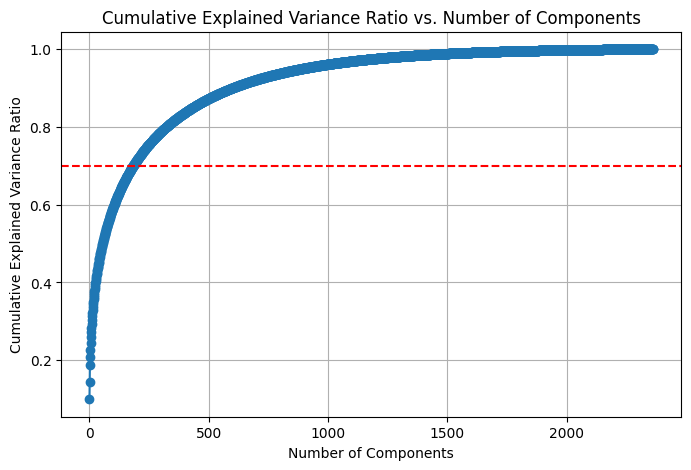

In [156]:
# Load and process training data
data_path = './feature/smote_merged_features_lbp_sift_glcm_hsv_hog64p.csv'
train_df = pd.read_csv(data_path, index_col=0)
labels = train_df['label'].values
X = train_df.drop(['label'], axis=1)
reduced_train_df = apply_pca(X, 
                             './PCA/pca70_smote_merged_features_lbp_sift_glcm_hsv_hog64p.joblib', 
                             './PCA/scaler70_smote_merged_features_lbp_sift_glcm_hsv_hog64p.joblib', 
                             0.7)

In [157]:
# Create DataFrame with PCA components
train_df = pd.DataFrame(reduced_train_df).add_prefix('pca_')
train_df['label'] = labels
train_df.to_csv('./feature/pca70_smote_merged_features_lbp_sift_glcm_hsv_hog64p.csv')

### OverSampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 데이터셋 로드
data_path = './feature/pca70_merged_features_lbp_sift_glcm_hsv_hog64p.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ADASYN 
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y_encoded)

print("원본 데이터 크기:", X.shape)
print("SMOTE 적용 후 데이터 크기:", X_resampled.shape)

# 결과를 데이터프레임으로 변환
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['label'] = label_encoder.inverse_transform(y_resampled)

# 중간 결과 저장
resampled_data_path = './feature/adasyn_pca70_merged_features_lbp_sift_glcm_hsv_hog64p.csv'
df_resampled.to_csv(resampled_data_path)

print(f"SMOTE 적용 후 데이터가 {resampled_data_path}에 저장되었습니다.")

## Classification

### KNN

In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# 데이터셋 로드
data_path = './feature/train_c1_t1_a1.csv'
df = pd.read_csv(data_path)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 KNN 모델 학습
    knn.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 KNN 모델 평가
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...


Cross-validation:  20%|██        | 1/5 [00:04<00:18,  4.61s/it]

1번째 폴드 정확도: 0.68
1번째 폴드 정밀도: 0.68
1번째 폴드 재현율: 0.68

2번째 폴드 학습 중...


Cross-validation:  40%|████      | 2/5 [00:08<00:13,  4.43s/it]

2번째 폴드 정확도: 0.76
2번째 폴드 정밀도: 0.71
2번째 폴드 재현율: 0.76

3번째 폴드 학습 중...


Cross-validation:  60%|██████    | 3/5 [00:12<00:08,  4.27s/it]

3번째 폴드 정확도: 0.76
3번째 폴드 정밀도: 0.80
3번째 폴드 재현율: 0.76

4번째 폴드 학습 중...


Cross-validation:  80%|████████  | 4/5 [00:17<00:04,  4.17s/it]

4번째 폴드 정확도: 0.75
4번째 폴드 정밀도: 0.80
4번째 폴드 재현율: 0.75

5번째 폴드 학습 중...


Cross-validation: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]

5번째 폴드 정확도: 0.74
5번째 폴드 정밀도: 0.79
5번째 폴드 재현율: 0.74

평균 정확도: 0.74
평균 정밀도: 0.76
평균 재현율: 0.74


### SVM

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

# 데이터셋 로드
data_path = './feature/hsv_color_histograms_888.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 단일 SVM 모델 생성
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 SVM 모델 학습
    svm.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 SVM 모델 평가
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...


Cross-validation:  20%|██        | 1/5 [00:06<00:25,  6.48s/it]

1번째 폴드 정확도: 0.48
1번째 폴드 정밀도: 0.49
1번째 폴드 재현율: 0.48

2번째 폴드 학습 중...


Cross-validation:  40%|████      | 2/5 [00:12<00:19,  6.47s/it]

2번째 폴드 정확도: 0.49
2번째 폴드 정밀도: 0.51
2번째 폴드 재현율: 0.49

3번째 폴드 학습 중...


Cross-validation:  60%|██████    | 3/5 [00:19<00:12,  6.47s/it]

3번째 폴드 정확도: 0.47
3번째 폴드 정밀도: 0.47
3번째 폴드 재현율: 0.47

4번째 폴드 학습 중...


Cross-validation:  80%|████████  | 4/5 [00:26<00:06,  6.59s/it]

4번째 폴드 정확도: 0.47
4번째 폴드 정밀도: 0.48
4번째 폴드 재현율: 0.47

5번째 폴드 학습 중...


Cross-validation: 100%|██████████| 5/5 [00:32<00:00,  6.53s/it]

5번째 폴드 정확도: 0.47
5번째 폴드 정밀도: 0.47
5번째 폴드 재현율: 0.47

평균 정확도: 0.47
평균 정밀도: 0.48
평균 재현율: 0.47


### XGBoosting

In [44]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

# 데이터셋 로드
data_path = './feature/select225_pca90_SMOTEENN_merged_features_lbp_sift_glcm_hsv_hog128p.csv'
df = pd.read_csv(data_path)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
print(X.shape)
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost 모델 생성
xgb_pipe = make_pipeline(StandardScaler(), XGBClassifier())

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 XGBoost 모델 학습
    xgb_pipe.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 XGBoost 모델 평가
    y_pred = xgb_pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')

(16830, 225)
교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...


C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
Cross-validation:  20%|██        | 1/5 [00:19<01:18, 19.71s/it]

1번째 폴드 정확도: 0.97
1번째 폴드 정밀도: 0.97
1번째 폴드 재현율: 0.97

2번째 폴드 학습 중...


Cross-validation:  40%|████      | 2/5 [00:37<00:56, 18.81s/it]

2번째 폴드 정확도: 0.96
2번째 폴드 정밀도: 0.96
2번째 폴드 재현율: 0.96

3번째 폴드 학습 중...


Cross-validation:  60%|██████    | 3/5 [00:56<00:37, 18.90s/it]

3번째 폴드 정확도: 0.98
3번째 폴드 정밀도: 0.98
3번째 폴드 재현율: 0.98

4번째 폴드 학습 중...


Cross-validation:  80%|████████  | 4/5 [01:14<00:18, 18.54s/it]

4번째 폴드 정확도: 0.97
4번째 폴드 정밀도: 0.97
4번째 폴드 재현율: 0.97

5번째 폴드 학습 중...


Cross-validation: 100%|██████████| 5/5 [01:32<00:00, 18.59s/it]

5번째 폴드 정확도: 0.97
5번째 폴드 정밀도: 0.97
5번째 폴드 재현율: 0.97

평균 정확도: 0.97
평균 정밀도: 0.97
평균 재현율: 0.97


### Logistic Regression

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

# 데이터셋 로드
data_path = './feature/hsv_color_histograms_888.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 로지스틱 회귀 모델 생성
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs'))

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 로지스틱 회귀 모델 학습
    log_reg.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 로지스틱 회귀 모델 평가
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...


Cross-validation:  20%|██        | 1/5 [00:03<00:13,  3.47s/it]

1번째 폴드 정확도: 0.49
1번째 폴드 정밀도: 0.48
1번째 폴드 재현율: 0.49

2번째 폴드 학습 중...


Cross-validation:  40%|████      | 2/5 [00:06<00:09,  3.25s/it]

2번째 폴드 정확도: 0.49
2번째 폴드 정밀도: 0.48
2번째 폴드 재현율: 0.49

3번째 폴드 학습 중...


Cross-validation:  60%|██████    | 3/5 [00:10<00:06,  3.43s/it]

3번째 폴드 정확도: 0.47
3번째 폴드 정밀도: 0.46
3번째 폴드 재현율: 0.47

4번째 폴드 학습 중...


Cross-validation:  80%|████████  | 4/5 [00:13<00:03,  3.46s/it]

4번째 폴드 정확도: 0.48
4번째 폴드 정밀도: 0.46
4번째 폴드 재현율: 0.48

5번째 폴드 학습 중...


Cross-validation: 100%|██████████| 5/5 [00:16<00:00,  3.38s/it]

5번째 폴드 정확도: 0.47
5번째 폴드 정밀도: 0.46
5번째 폴드 재현율: 0.47

평균 정확도: 0.48
평균 정밀도: 0.47
평균 재현율: 0.48


### Random Forest

(35618, 216)
교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...
1번째 폴드 정확도: 0.81
1번째 폴드 정밀도: 0.83
1번째 폴드 재현율: 0.81


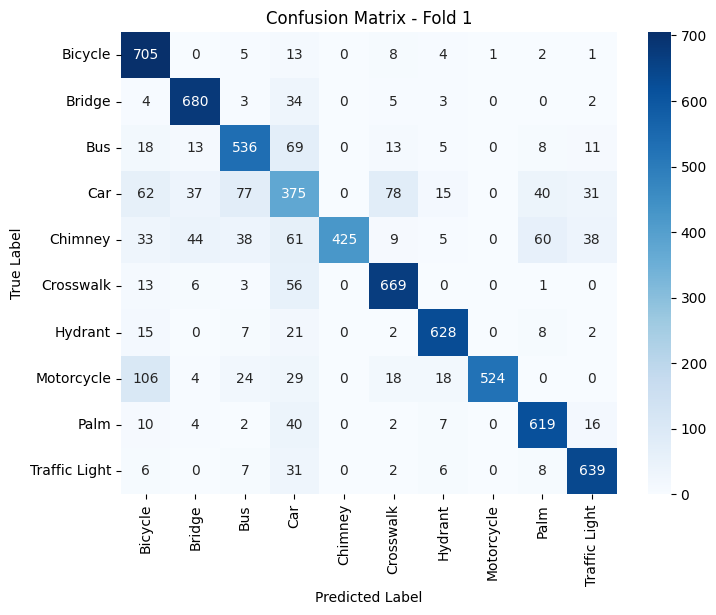

Cross-validation:  20%|██        | 1/5 [01:45<07:01, 105.27s/it]


2번째 폴드 학습 중...
2번째 폴드 정확도: 0.87
2번째 폴드 정밀도: 0.87
2번째 폴드 재현율: 0.87


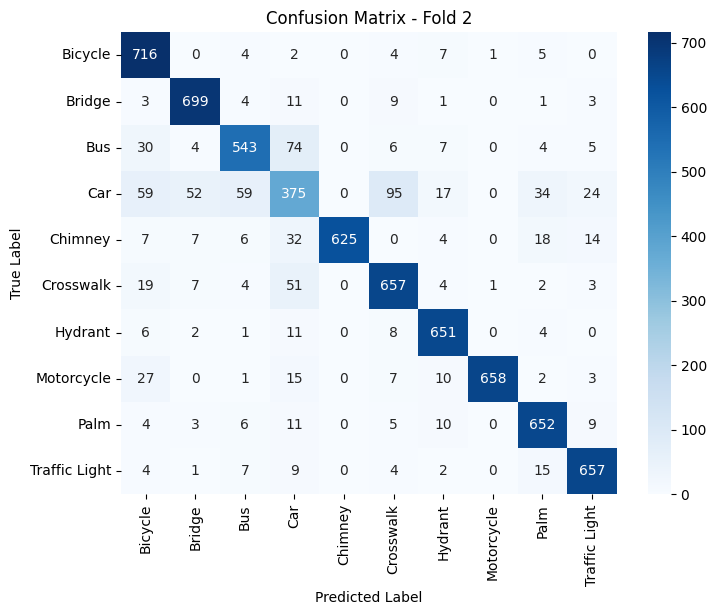

Cross-validation:  40%|████      | 2/5 [03:30<05:15, 105.20s/it]


3번째 폴드 학습 중...
3번째 폴드 정확도: 0.92
3번째 폴드 정밀도: 0.92
3번째 폴드 재현율: 0.92


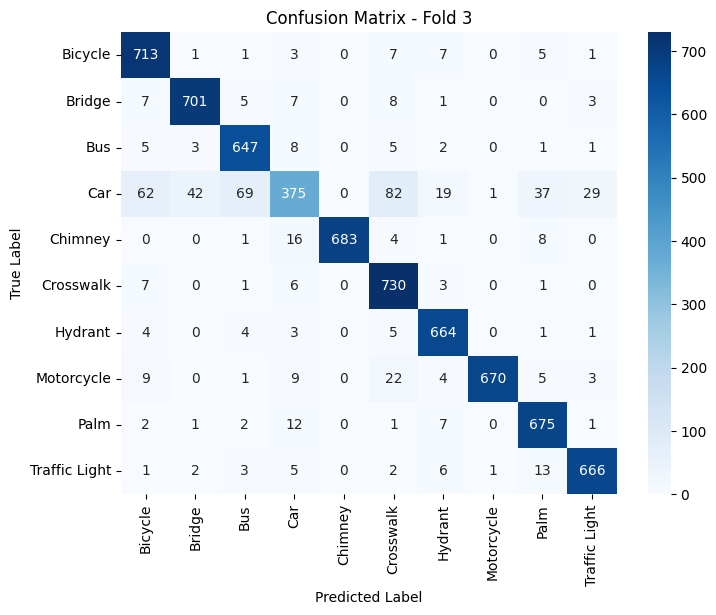

Cross-validation:  60%|██████    | 3/5 [05:15<03:29, 104.94s/it]


4번째 폴드 학습 중...
4번째 폴드 정확도: 0.90
4번째 폴드 정밀도: 0.90
4번째 폴드 재현율: 0.90


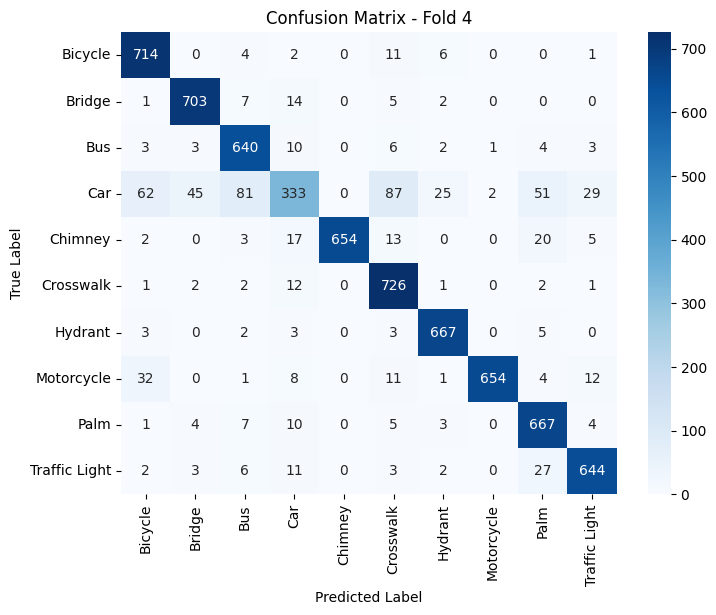

Cross-validation:  80%|████████  | 4/5 [06:58<01:44, 104.44s/it]


5번째 폴드 학습 중...
5번째 폴드 정확도: 0.90
5번째 폴드 정밀도: 0.90
5번째 폴드 재현율: 0.90


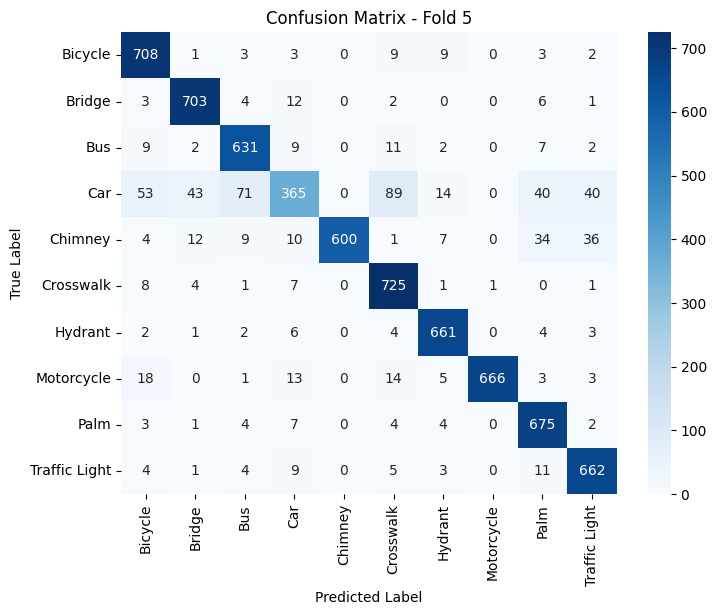

Cross-validation: 100%|██████████| 5/5 [08:43<00:00, 104.60s/it]


평균 정확도: 0.88
평균 정밀도: 0.88
평균 재현율: 0.88


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,  confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
import seaborn as sns

# 데이터셋 로드
data_path = './feature/adasyn_pca70_merged_features_lbp_sift_glcm_hsv_hog64p.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
print(X.shape)
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 랜덤 포레스트 모델 생성
#rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
conf_matrices = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 랜덤 포레스트 모델 학습
    rf.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 랜덤 포레스트 모델 평가
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # 오차 행렬 계산
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

    # 오차 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


### Ensemble

(35618, 216)
교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...
1번째 폴드 정확도: 0.83
1번째 폴드 정밀도: 0.84
1번째 폴드 재현율: 0.83


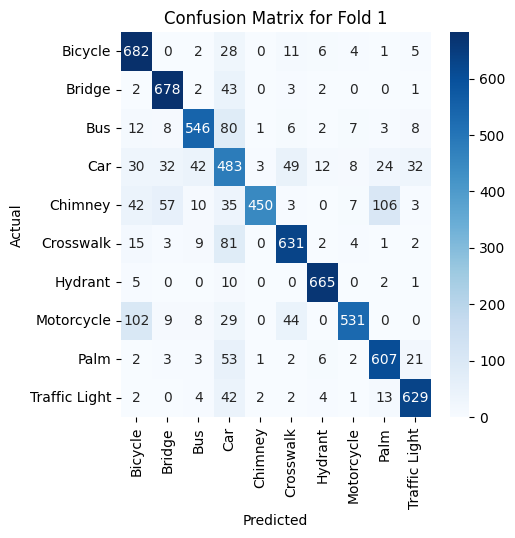

Cross-validation:  20%|██        | 1/5 [15:17<1:01:11, 917.87s/it]


2번째 폴드 학습 중...
2번째 폴드 정확도: 0.87
2번째 폴드 정밀도: 0.88
2번째 폴드 재현율: 0.87


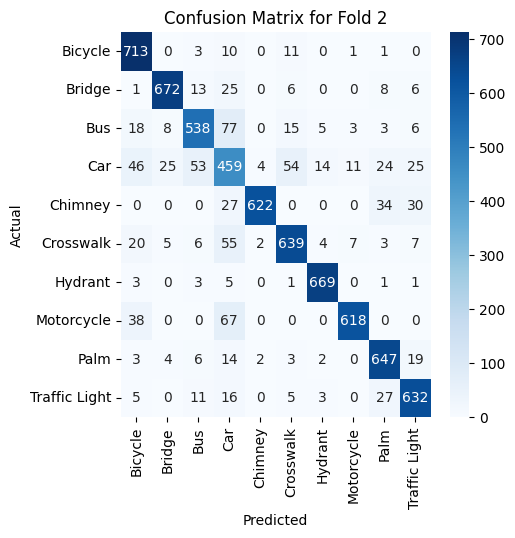

Cross-validation:  40%|████      | 2/5 [29:53<44:39, 893.24s/it]  


3번째 폴드 학습 중...
3번째 폴드 정확도: 0.92
3번째 폴드 정밀도: 0.92
3번째 폴드 재현율: 0.92


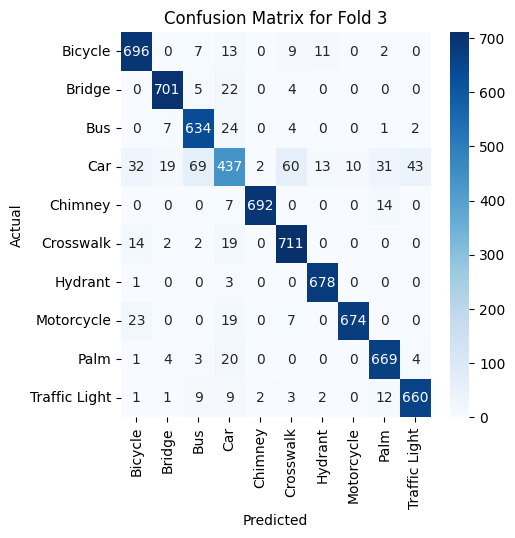

Cross-validation:  60%|██████    | 3/5 [44:53<29:52, 896.09s/it]


4번째 폴드 학습 중...
4번째 폴드 정확도: 0.91
4번째 폴드 정밀도: 0.91
4번째 폴드 재현율: 0.91


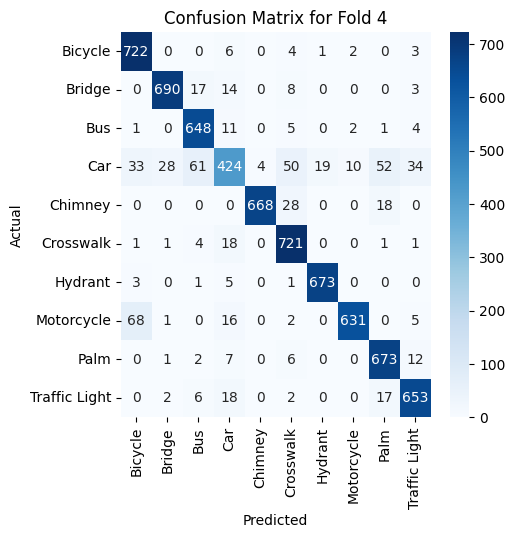

Cross-validation:  80%|████████  | 4/5 [59:45<14:54, 894.63s/it]


5번째 폴드 학습 중...
5번째 폴드 정확도: 0.90
5번째 폴드 정밀도: 0.90
5번째 폴드 재현율: 0.90


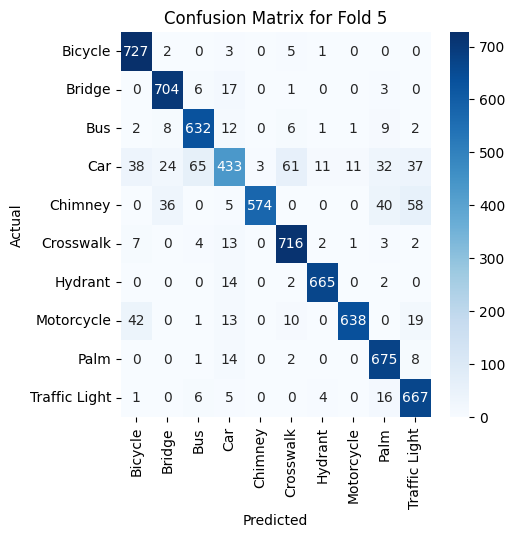

Cross-validation: 100%|██████████| 5/5 [1:13:36<00:00, 883.33s/it]


평균 정확도: 0.89
평균 정밀도: 0.89
평균 재현율: 0.89


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 데이터셋 로드
labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']
data_path = './feature/adasyn_pca70_merged_features_lbp_sift_glcm_hsv_hog64p.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
print(X.shape)
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 개별 모델 생성
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=6, random_state=42)
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
#knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# 앙상블 모델 생성 (VotingClassifier)
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm),
    ('xgb', xgb),
    ('log_reg', log_reg),
    ('rf', rf),
    #('knn', knn)
], voting='soft')

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 앙상블 모델 학습
    ensemble_model.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 앙상블 모델 평가
    y_pred = ensemble_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


### Model save

In [30]:
import joblib
# Save the trained ensemble model
model_path = './model/ensemble_adasyn_pca70_merged_features_lbp_sift_glcm_hsv_hog64p.joblib'
joblib.dump(ensemble_model, model_path)
print(f"Ensemble model saved to {model_path}")

Ensemble model saved to ./model/ensemble_adasyn_pca70_merged_features_lbp_sift_glcm_hsv_hog64p.joblib


## Test

### Test Dataset Feature extraction

In [13]:
dataset_path = 'C:/Users/gdeok/Desktop/chcv/early-vision/query'
#labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']

In [18]:
import numpy as np
import cv2
import os
from tqdm import tqdm

sift_images=[]
all_descriptors = []
filenames = []
for root,_,files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png'):
            sift_images.append(os.path.join(root, file))

sift = cv2.SIFT_create()
for image_path in tqdm(sift_images, desc="Processing images"):
    image=cv2.imread(image_path)
    if image is not None:
        filenames.append(os.path.splitext(os.path.basename(image_path))[0])

        # preprocessing
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gauss_blur_gs = cv2.GaussianBlur(gray_image, ksize=(3,3), sigmaX=0, sigmaY=0)
        equalized_image = cv2.equalizeHist(gauss_blur_gs)
        sharp=cv2.addWeighted(gray_image, 2, equalized_image, -1, 0)
        
        if sharp is not None:
            _ , descriptor = sift.detectAndCompute(sharp, None)
            if descriptor is not None:
                all_descriptors.append(descriptor)

if all_descriptors:
    all_descriptors = np.vstack(all_descriptors)

Processing images: 100%|██████████| 100/100 [00:00<00:00, 110.24it/s]


In [19]:
import cv2
import os
from tqdm import tqdm
import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def extract_label(filename):
    return filename.split(' ')[0]

images=[]
filenames=[]
hsv_features=[]
lbp_features=[]
glcm_features=[]
sift_bovw_features=[]
hog_features=[]

# for sift to bovw
k = 53
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(all_descriptors)
sift = cv2.SIFT_create()

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png'):
            images.append(os.path.join(root, file))

# Sort images by label
images.sort(key=lambda x: extract_label(os.path.basename(x)))

for image_path in tqdm(images, desc="Processing images"):
    image=cv2.imread(image_path)

    if image is not None:
        filenames.append(os.path.splitext(os.path.basename(image_path))[0])

        # preprocessing
        gauss_blur_hsv = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0, sigmaY=0)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gauss_blur_gs = cv2.GaussianBlur(gray_image, ksize=(3,3), sigmaX=0, sigmaY=0)
        equalized_image = cv2.equalizeHist(gauss_blur_gs)
        sharp=cv2.addWeighted(gray_image, 2, equalized_image, -1, 0)
        
        # feature extraction
        lbp = compute_lbp_var_multiresolution(equalized_image, params = [(8, 1), (24, 3)])
        hsv = hsv_histogram(gauss_blur_hsv, bins=(8,8,8))
        gabor_glcm= GaborGLCM(ksize=11, distances=[1, 2, 3], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])
        glcm = gabor_glcm.compute_combined_features(equalized_image)
        keypoints, descriptors = sift.detectAndCompute(sharp, None)
        sift_bovw = compute_bovw_histogram(descriptors, kmeans)
        hog = extract_hog_features(equalized_image)

        # append features
        lbp_features.append(lbp)
        hsv_features.append(hsv)
        glcm_features.append(glcm)
        sift_bovw_features.append(sift_bovw)
        hog_features.append(hog)

        

Processing images: 100%|██████████| 100/100 [25:14<00:00, 15.15s/it]


In [20]:
import pandas as pd

lbp_df = pd.DataFrame(lbp_features).add_suffix('_lbp')
glcm_df = pd.DataFrame(glcm_features)
hsv_df = pd.DataFrame(hsv_features).add_suffix('_hsv')
sift_bovw_df = pd.DataFrame(sift_bovw_features).add_suffix('_bovw')
hog_df = pd.DataFrame(hog_features).add_suffix('_hog')

In [21]:
import pandas as pd

# Combine test data
df_combined = pd.concat([lbp_df, sift_bovw_df, glcm_df, hsv_df, hog_df], axis=1)

# 중간저장
df_combined.to_csv('./query.csv')
df_combined.shape

(100, 2361)

### 중간 저장 완료

In [35]:
df_combined =pd.read_csv('../query.csv', index_col=0)
df_combined.shape

(100, 2361)

In [36]:
pca_model_path = './pca70_c1_t1_a1.joblib'
scaler_model_path = './scaler70_c1_t1_a1.joblib'

pca_model = joblib.load(pca_model_path)
scaler_model = joblib.load(scaler_model_path)

In [37]:
test_df_scaled = scaler_model.transform(df_combined)
test_df_pca = pca_model.transform(test_df_scaled)
test_df_pca = pd.DataFrame(test_df_pca, columns=[f'pca_{i}' for i in range(test_df_pca.shape[1])])
test_df_pca.shape

(100, 216)

### Task 1: Classification

In [26]:
import pandas as pd
import joblib

# Load the saved model
model_path = './ensemble_c1_t1_a1.joblib'
model = joblib.load(model_path)
print("Model loaded successfully!")

Model loaded successfully!


In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 예측 수행
y_pred = model.predict(test_df_pca)

# 원본 레이블 인코더 로드 또는 재정의
original_labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']
label_encoder = LabelEncoder()
label_encoder.fit(original_labels)

# 디코딩
predict_labels = label_encoder.inverse_transform(y_pred)

C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [40]:
import csv

with open('c1_t1_a1.csv','w', newline='') as file :
    write = csv.writer(file)
    for i, predict_label in enumerate(predict_labels):
        write.writerow([f'query{i+1:03}.png', predict_label])

### Task 2: Retrieval

In [43]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# 데이터셋 로드
data_path = './train_c1_t2_a1.csv'
df = pd.read_csv(data_path, index_col=0)

# 특징과 레이블 분리
X = df.drop('label', axis=1).values
print(X.shape)
y = df['label'].values

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')

# 5-폴드 교차 검증을 위한 StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5)

accuracies = []
precisions = []
recalls = []
fold = 0

print("교차 검증 시작...")

for train_index, test_index in tqdm(skf.split(X, y_encoded), total=5, desc='Cross-validation'):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    print(f'\n{fold}번째 폴드 학습 중...')
    
    # 학습 데이터셋으로 KNN 모델 학습
    knn.fit(X_train, y_train)
    
    # 테스트 데이터셋으로 KNN 모델 평가
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f'{fold}번째 폴드 정확도: {accuracy:.2f}')
    print(f'{fold}번째 폴드 정밀도: {precision:.2f}')
    print(f'{fold}번째 폴드 재현율: {recall:.2f}')

# 평균 성능 지표 계산
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'\n평균 정확도: {average_accuracy:.2f}')
print(f'평균 정밀도: {average_precision:.2f}')
print(f'평균 재현율: {average_recall:.2f}')


(35760, 216)
교차 검증 시작...


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


1번째 폴드 학습 중...


Cross-validation:  20%|██        | 1/5 [00:09<00:36,  9.15s/it]

1번째 폴드 정확도: 0.76
1번째 폴드 정밀도: 0.74
1번째 폴드 재현율: 0.76

2번째 폴드 학습 중...


Cross-validation:  40%|████      | 2/5 [00:18<00:27,  9.07s/it]

2번째 폴드 정확도: 0.83
2번째 폴드 정밀도: 0.82
2번째 폴드 재현율: 0.83

3번째 폴드 학습 중...


Cross-validation:  60%|██████    | 3/5 [00:27<00:18,  9.08s/it]

3번째 폴드 정확도: 0.89
3번째 폴드 정밀도: 0.89
3번째 폴드 재현율: 0.89

4번째 폴드 학습 중...


Cross-validation:  80%|████████  | 4/5 [00:36<00:09,  9.00s/it]

4번째 폴드 정확도: 0.89
4번째 폴드 정밀도: 0.89
4번째 폴드 재현율: 0.89

5번째 폴드 학습 중...


Cross-validation: 100%|██████████| 5/5 [00:45<00:00,  9.07s/it]

5번째 폴드 정확도: 0.89
5번째 폴드 정밀도: 0.89
5번째 폴드 재현율: 0.89

평균 정확도: 0.85
평균 정밀도: 0.85
평균 재현율: 0.85


In [44]:
neigh_ind = knn.kneighbors(X=test_df_pca, n_neighbors=10, return_distance=False) # Top-10 results
neigh_labels = np.array(y)[neigh_ind]

C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [45]:
print(neigh_labels)    # array(100x10)

[['Chimney' 'Chimney' 'Hydrant' 'Chimney' 'Chimney' 'Chimney' 'Chimney'
  'Crosswalk' 'Chimney' 'Chimney']
 ['Bus' 'Chimney' 'Bridge' 'Bus' 'Bridge' 'Bus' 'Crosswalk' 'Chimney'
  'Palm' 'Motorcycle']
 ['Bicycle' 'Traffic Light' 'Bicycle' 'Bicycle' 'Bicycle' 'Bicycle'
  'Bicycle' 'Bicycle' 'Hydrant' 'Traffic Light']
 ['Chimney' 'Chimney' 'Chimney' 'Chimney' 'Crosswalk' 'Chimney' 'Chimney'
  'Chimney' 'Bus' 'Chimney']
 ['Car' 'Bus' 'Bridge' 'Car' 'Car' 'Bridge' 'Palm' 'Car' 'Car'
  'Crosswalk']
 ['Car' 'Motorcycle' 'Palm' 'Hydrant' 'Motorcycle' 'Motorcycle' 'Palm'
  'Palm' 'Motorcycle' 'Palm']
 ['Crosswalk' 'Palm' 'Chimney' 'Crosswalk' 'Chimney' 'Crosswalk'
  'Chimney' 'Crosswalk' 'Chimney' 'Motorcycle']
 ['Chimney' 'Chimney' 'Chimney' 'Chimney' 'Chimney' 'Chimney' 'Hydrant'
  'Chimney' 'Crosswalk' 'Chimney']
 ['Bus' 'Bridge' 'Bridge' 'Crosswalk' 'Chimney' 'Chimney' 'Bicycle' 'Car'
  'Car' 'Hydrant']
 ['Chimney' 'Chimney' 'Chimney' 'Chimney' 'Chimney' 'Hydrant' 'Chimney'
  'Chimney' 'Chi

In [46]:
import csv

with open('c1_t2_a1.csv', 'w', newline='') as file :
    write = csv.writer(file)
    for i, neigh_label in enumerate(neigh_labels):
        write.writerow([f'query{i+1:03}.png'] + list(neigh_label))